# Bike Sharing Dataset

### 1. Introduction
1.1 Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Today, there exists great interest in the bike sharing systems due to their important role in traffic, environmental and health issues.

1.2 Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

### 2. Dataset 
2.1 The dataset belongs to Capital Bikeshare, bike-sharing company. The data spans a period of two years (January 1, 2011 – December 31, 2012). This dataset contains the hourly and daily count of rental bikes with the corresponding weather and seasonal information. The dataset is taken from https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset .

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
bike_sharing.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


2.2 There are 731 rows 16 columns. Each row describes the number of bike rentals for a single day and the corresponding weather. The columns include:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : (1: Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

- temp : Normalized temperature in Celsius. 
- atemp: Normalized feeling temperature in Celsius. 
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### 3. Number of rentals 

3.1. Over the two years in 2011 and 2012, the total number of bikes rented was 3,292,679. From this total number, 2,672,662 rental were by registered users and this is 81.16% of the total number of bikes rented. The rest (620,017 rentals) were by casual users. 

Total Number of bikes rental: 3292679
Total Number of bikes rental by registered users: 2672662
Total Number of bikes rental by casual users: 620017
Percentage of rental by registered users: 81


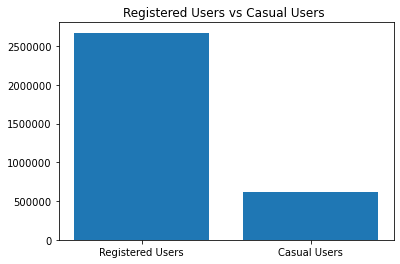

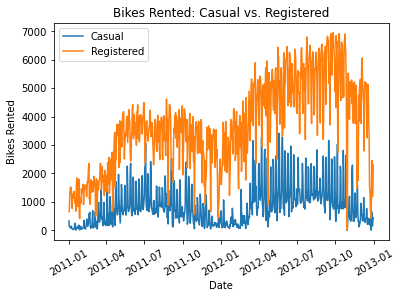

In [3]:
### Changing column-'dteday' type to datetime ###
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'], format="%Y-%m-%d")

### Total number of bikes rented in 2011 and 2012 ###
registered_and_casual = bike_sharing["cnt"].sum()
print("Total Number of bikes rental:", registered_and_casual)

### Total number of bikes rented by registered users ###
registered = bike_sharing["registered"].sum()
print("Total Number of bikes rental by registered users:", registered)

### Total number of bikes rented by casual users ###
casual = bike_sharing["casual"].sum()
print("Total Number of bikes rental by casual users:", casual)

### Calculating percentage of total rental by the registered users ###
registered_perc=round(registered / registered_and_casual*100)
print("Percentage of rental by registered users:", registered_perc)

### using bar() to visualize bike rental by registered and casual users ###
users = ["Registered Users", "Casual Users"]
count = [registered, casual]
plt.bar(users, count)
plt.title("Registered Users vs Casual Users ")
plt.ticklabel_format(axis='y', style='plain')
plt.show()

### using plot() to visualize bike rental by registered and casual users ###
plt.plot(bike_sharing["dteday"], bike_sharing["casual"], label="Casual")
plt.plot(bike_sharing["dteday"], bike_sharing["registered"], label="Registered")
plt.xticks(rotation=30)
plt.title("Bikes Rented: Casual vs. Registered")
plt.ylabel("Bikes Rented")
plt.xlabel("Date")
plt.legend()
plt.show()

### 4. Increase in the numder of rentals

4.1. The total number of bikes rented in 2011 was 1,243,103. In 2012, this number increased by about 65% to 2,049,576.

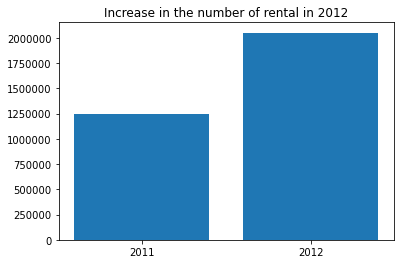

Total percentage increase in te number of rental: 65


In [4]:
### Using sum() to calculate the number of rentals in 2011 ###
rental_2011 = bike_sharing.loc[bike_sharing["dteday"].dt.year==2011, "cnt"].sum()

### Using sum() to calculate the number of rentals in 2012 ###
rental_2012 = bike_sharing.loc[bike_sharing["dteday"].dt.year==2012, "cnt"].sum()

### clculating the increase in the rental in percentage ###
total_perc_increase = round((rental_2012 - rental_2011) / rental_2011 * 100)

### Using the bar plot to visualize the increase in the number of rentals ###
year = ["2011", "2012"]
rental = [rental_2011, rental_2012]
plt.bar(year, rental)
plt.title("Increase in the number of rental in 2012")
plt.ticklabel_format(axis='y', style='plain')
plt.show()

print("Total percentage increase in te number of rental:", total_perc_increase)

4.2. About two-third of this increase in rental is attributable to the registered users. The number of bikes rented by registered users in 2012 increased by 68% from 995,851 in 2011 to 1,676,811 in 2012.

In [5]:
### Counting number of rental by registered users in 2011 ###
rental_2011_registered=bike_sharing.loc[bike_sharing["dteday"].dt.year==2011, "registered"].sum() 

### Counting number of rental by registered users in 2012 ###
rental_2012_registered=bike_sharing.loc[bike_sharing["dteday"].dt.year==2012, "registered"].sum() 

### Calculating the percentage rise in rental in 2012 ###
rental_rise_registered = rental_2012_registered - rental_2011_registered 
registered_perc_increase = round((rental_rise_registered / rental_2011_registered)*100)
print("Percentage increase in the number of rental by registered users:", registered_perc_increase)

Percentage increase in the number of rental by registered users: 68


4.3. The number of bikes rented by casual users in 2012 also increased by 51% from 247,252 to 372,765.

In [6]:
### Counting number of rental by casual users in 2011 ###
rental_2011_casual=bike_sharing.loc[bike_sharing["dteday"].dt.year==2011, "casual"].sum() 

### Counting number of rental by casual users in 2012 ###
rental_2012_casual=bike_sharing.loc[bike_sharing["dteday"].dt.year==2012, "casual"].sum() 

### Calculating the percentage rise in rental in 2012 ###
rental_rise_casual = rental_2012_casual - rental_2011_casual 
casual_perc_increase = round((rental_rise_casual / rental_2011_casual)*100)

print("Percentage increase in the number of rental by casual users:", casual_perc_increase)

Percentage increase in the number of rental by casual users: 51


### 5. Seasonal trend

5.1. Capital Bikeshare operates only in the northern hemisphere. So the summer months are June-August, and the winter months are December-February. For the entire two-year period, the number of rented bikes is at its lowest during the winter months and at its highest during the summer months. 

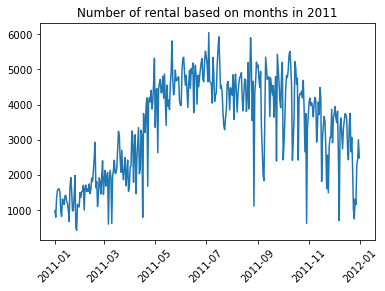

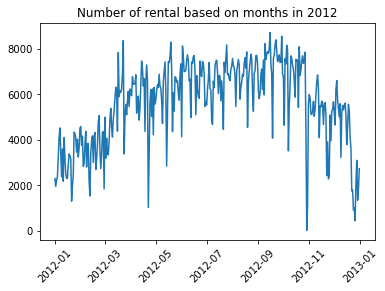

In [7]:
### extracting entries for the year 2011 and 2012 and assigning them to variables ###
date_2011 = bike_sharing.loc[bike_sharing["dteday"].dt.year==2011, "dteday"]
date_2012 = bike_sharing.loc[bike_sharing["dteday"].dt.year==2012, "dteday"]

### extracting number of rental in 2011 and 2012 and assigning them to variables ###
cnt_2011 = bike_sharing.loc[bike_sharing["dteday"].dt.year==2011, "cnt"]
cnt_2012 = bike_sharing.loc[bike_sharing["dteday"].dt.year==2012, "cnt"]

### Using the line graph plot to visualize number of rental against months in 2011###
plt.plot(date_2011, cnt_2011, label="2011")
plt.title("Number of rental based on months in 2011")
plt.xticks(rotation=45)
plt.show()

### Using the line graph plot to visualize number of rental against months in 2012 ###
plt.plot(date_2012, cnt_2012, label="2012")
plt.title("Number of rental based on months in 2012")
plt.xticks(rotation=45)
plt.show()

5.2. In fact, we see quite a few similar patterns for both 2011 and 2012 with respect to the number of rentals: 

- The number of rental keeps increasing in the January-May interval.
- There is a plateau in the May-September interval, where the number of rentals stays high but constant (it neither increases nor decreases
- The number of rental keeps decreasing in the September-December interval.

### 6. Effect of temperature on rentals

6.1. There is a positive correlation (0.627) between the the rise/fall in temperature and the number of rented bikes. Biking is an outdoor activity, and people often don't ride when it's too cold outside — the wind feels very cold when you're moving.

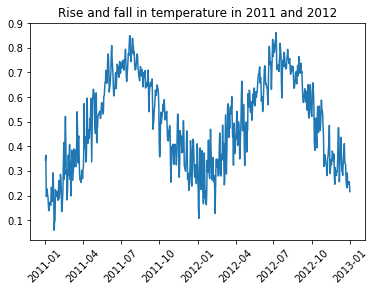

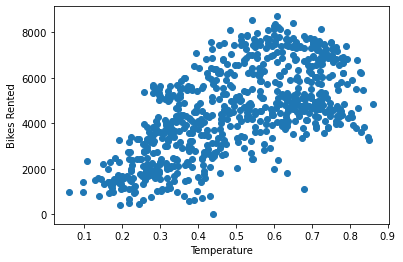

Correlation between rental numbers and temperature: 0.6274940090334918


In [8]:
### Using the line graph plot to visualize the temperature against months in 2011 and 2012 ###
plt.plot(bike_sharing["dteday"], bike_sharing["temp"])
plt.title("Rise and fall in temperature in 2011 and 2012")
plt.xticks(rotation=45)
plt.show()

### using scatter plot to visualize the correlation between temperature and number of bikes rented ###
plt.scatter(bike_sharing['temp'], bike_sharing['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.show()


### finding correlation between temperature and number of bikes rented ###
print("Correlation between rental numbers and temperature:", bike_sharing["temp"].corr(bike_sharing["cnt"]))

6.2. In fact, we see quite a few similar patterns for both 2011 and 2012:

- When the temperature grows, the number of bike rentals tends to grow too. 
- When the temperature decreases, the number of rentals tends to decrease too. 

6.3. The correlation between the temperature and the feel of the temperature is 0.991. This supports the abovesaid finding that people tend to ride more during then summer than the winter.

Correlation between temperature numbers and the feel of the temperature: 0.9917015532294641


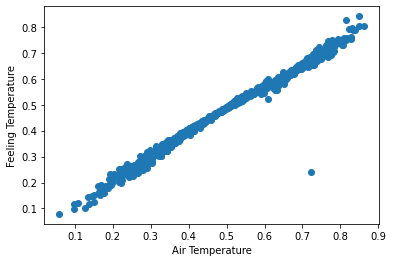

In [9]:
### finding correlation between temperature and the feel of the temperature ###
print("Correlation between temperature numbers and the feel of the temperature:",bike_sharing["temp"].corr(bike_sharing["atemp"]))

### using the scatter line graph plot correlation between temperature and the feel of the temperature ###
plt.scatter(bike_sharing['temp'], bike_sharing['atemp'])
plt.xlabel('Air Temperature')
plt.ylabel('Feeling Temperature')
plt.show()

6.4 However, correlation (0.627) between the number of rentals and temperature isn't perfect.

### 7. Effect of windspeed on rental

7.1. Both the temperature and the windpseed columns relate to the number of rental, but in a different way. 

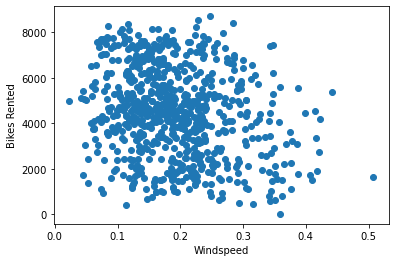

In [10]:
### using the scatter plot to visualize the correlation between windspeed and number of bikes rented ###
plt.scatter(bike_sharing['windspeed'], bike_sharing['cnt'])
plt.xlabel('Windspeed')
plt.ylabel('Bikes Rented')
plt.show()

7.2. While the temperature versus the number of rental shows an upward trend, windspeed versus the number of rental shows a downward trend (approximately). In other words, when the wind speed increases, the number of rental decreases. As increase in the windspeed can give a chilling sensation, people usually prefer not to ride bikes when its windy outside. 

### 8. Working Day and type of users

8.1. The registered users tend to use the bikes more on working days — probably to commute to work. On the other hand, the casual users tend to rent the bikes more on the weekends and holidays — probably for some leisure time.

8.2. The correlations with working day is calculated at -0.518044 for casual users and 0.303907 for registered users. 

In [11]:
### extracting value counts for working days and non-working days ###
bike_sharing['workingday'].value_counts()
### extracting correlations between working days and type of users ###
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

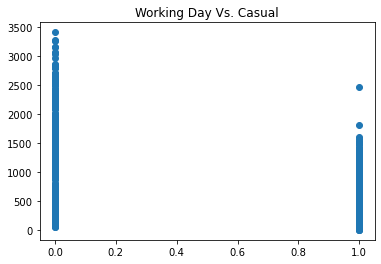

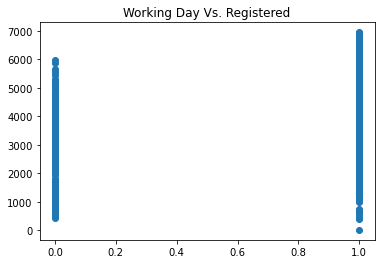

In [12]:
### using scatter plot to visualize the correlations between casual users and wordking days ###
day = ["Working", "Non-Working"]
plt.scatter(bike_sharing['workingday'], bike_sharing['casual'])
plt.title('Working Day Vs. Casual')
plt.show()

### using scatter plot to visualize the correlations between registered users and wordking days ###
plt.scatter(bike_sharing['workingday'], bike_sharing['registered'])
plt.title('Working Day Vs. Registered')
plt.show()

8.3. On non-working days, casual users rent on average more than double the number of bikes they rent on working days: 1,371 bikes compared to 607 bikes. 

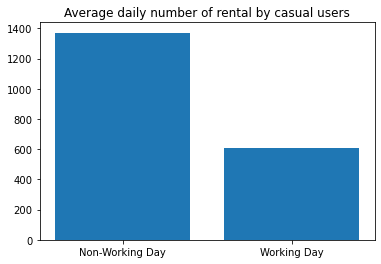

In [13]:
### Calculating average number of rental on non-working days by registered users ###
nonworking_rental_sum = bike_sharing.loc[bike_sharing["workingday"]==0, "registered"].sum() 
nonworking_rental_count = bike_sharing.loc[bike_sharing["workingday"]==0, "workingday"].value_counts()
non_working_averge_rental_registered = nonworking_rental_sum / nonworking_rental_count

### Calculating average number of rental on working days by registered users ###
working_averge_rental_registered = bike_sharing.loc[bike_sharing["workingday"]==1, "registered"].sum() / bike_sharing.loc[bike_sharing["workingday"]==1, "workingday"].value_counts()

### Calculating average number of rental on working days by casual users ###
working_averge_rental_casual = bike_sharing.loc[bike_sharing["workingday"]==1, "casual"].sum() / bike_sharing.loc[bike_sharing["workingday"]==1, "workingday"].value_counts()

### Calculating average number of rental on non-working days by casual users ###
non_working_averge_rental_casual = bike_sharing.loc[bike_sharing["workingday"]==0, "casual"].sum() / bike_sharing.loc[bike_sharing["workingday"]==0, "workingday"].value_counts()

working_days = ['Non-Working Day', 'Working Day']
casual_avg = [1371, 607]

plt.bar(working_days, casual_avg)
plt.title("Average daily number of rental by casual users")
plt.show()

8.4. Conversely, registered users rent significantly less during non-working days: 2,959 compared to 3,978 bikes.

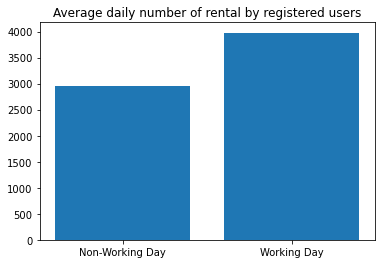

In [14]:
working_days = ['Non-Working Day', 'Working Day']
registered_avg = [2959, 3978]
plt.bar(working_days, registered_avg)
plt.title("Average daily number of rental by registered users")
plt.show()

8.5. This is further corroborated by the average number of rentals for registered and casual users based on the day of the week.

   weekday       casual   registered
0        0  1338.295238  2890.533333
1        1   674.133333  3663.990476
2        2   556.182692  3954.480769
3        3   551.144231  3997.394231
4        4   590.961538  4076.298077
5        5   752.288462  3938.000000
6        6  1465.257143  3085.285714


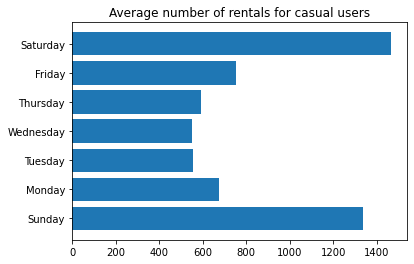

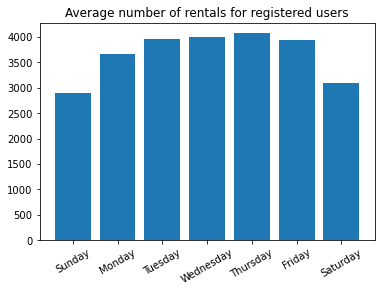

In [15]:
### use Series.sort_index() to sort the index in an ascending order ###
bike_sharing['weekday'].value_counts().sort_index()

### Finding average number of rentals for casual and registered users based on the day of the week ###
weekday_averages = bike_sharing.groupby('weekday').mean()[['casual', 'registered']].reset_index()
print(weekday_averages)

### Using barh() to visualize average number of rentals for casual users based on the day of the week ###
plt.barh(weekday_averages["weekday"], weekday_averages["casual"])
plt.yticks(ticks=[0,1,2,3,4,5,6], labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title("Average number of rentals for casual users")
plt.show()

### Using barh() to visualize average number of rentals for registered users based on the day of the week ###
plt.bar(weekday_averages["weekday"], weekday_averages["registered"])
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=30)
plt.title("Average number of rentals for registered users")
plt.show()

### 9. Effect of weather on rentals

9.1. The 'weathersit' column consists numeric values which represent the following:
* 1: clear or few clouds
* 2: mist or cloudy
* 3: light rain, light snow, thunderstorm
* 4: heavy rain, snow, ice pellets, fog

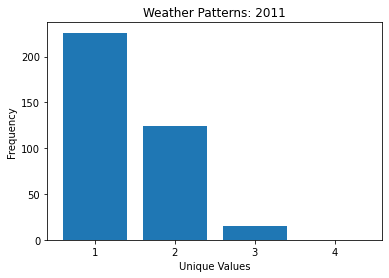

In [16]:
### Extracting unique values in the 'weathersit' column ###
bike_sharing['weathersit'].unique()

### for the year 2011, finding value count for each unique value in the 'weathersit' column ###
bike_sharing.loc[bike_sharing["dteday"].dt.year==2011, "weathersit"].value_counts()

### for the year 2012, finding value count for each unique value in the 'weathersit' column ###
bike_sharing.loc[bike_sharing["dteday"].dt.year==2012, "weathersit"].value_counts()

### putting the unique values and the value counts for each year in lists ###    
unique_values = [1, 2, 3, 4]
weather_2011 = [226, 124, 15, 0]
weather_2012 = [237, 123, 6, 0]

### Using bar() to visualize the frequency of weather patterns in 2011 ###
plt.bar(unique_values, weather_2011)
plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns: 2011')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()

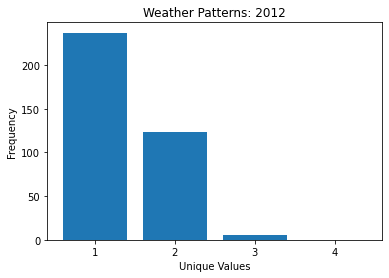

In [17]:
### Using bar() to visualize the frequency of weather patterns in 2012 ###
plt.bar(unique_values, weather_2012)
plt.title('Weather Patterns: 2012')
plt.xticks(ticks=[1,2,3,4])
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.show()

9.2. For most days (463 days), the sky is clear or has a few clouds. However, there are also days (247 days) where we see mist or the sky is cloudy. 

9.3. Quite rarely (21 days in two years), we have light rains, light snows, or thunderstorms. Also, heavy rains or snows are extremely rare in Washington, D.C. (no occurrences in 2011 and 2012).

### 10. Frequency of rental

10.1. The frequency table for the 'cnt' column (which describes the total number of bike rentals) has 696 unique values. The unique values are here in number intervals. 

10.2. The unique values are number intervals. (4368.0, 5237.2] is a number interval. This '(' indicates that the starting number is not included, while this ']' indicates that the ending number is included. Therefore the interval (4368.0, 5237.2] contains all numbers greater than 4368.0 and less than or equal to 5237.2.

In [18]:
### extracting value counts for the 'cnt' column with 10 bins ###
bike_sharing['cnt'].value_counts(bins=10).sort_index()

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64

10.3. The range over the two years (2011 and 2012) is between 0 and 9,000 bike rentals. The days when the number of rental goes under 890 is rare. 

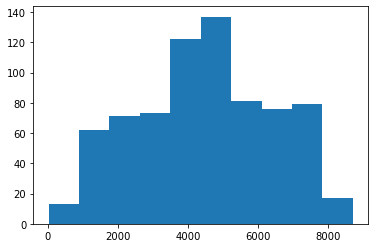

In [19]:
### Using hist() to visualize the frequency of 'cnt' column ###
plt.hist(bike_sharing['cnt'])
plt.show()

10.4. Most typically, the number of bike rentals per day varies between 4369 and 5237. Based on the histogram, this varies between 4,500 and 5,000 — the tallest bar is around that interval. The height of that bar indicates that we had about 140 days when rentals were between 4,500 and 5,000.

10.5. For most days, the number of rentals ranges between 1,000 and 7,500 — we see the tallest bars around this larger interval.

10.6. The days when the number of bike rentals goes over 7845 are vey rare. 

10.7. Most uncommonly, the number of rentals per day goes under 1,000 or over 8,000 — the bars are short around these values, with a frequency of 20 or less.

### 11. Frequency based on user type

 11.1. The unique values are here in number intervals. For the registsred users, (3483.0, 4175.6] is a number interval. The number of rentals falling within this range has appeared the highest number of times in the dataset. 

In [20]:
### extracting value counts for the 'registered' column with 10 bins ###
bike_sharing['registered'].value_counts(bins=10).sort_index()

(13.073, 712.6]      14
(712.6, 1405.2]      44
(1405.2, 2097.8]     79
(2097.8, 2790.4]     80
(2790.4, 3483.0]    113
(3483.0, 4175.6]    144
(4175.6, 4868.2]     85
(4868.2, 5560.8]     71
(5560.8, 6253.4]     57
(6253.4, 6946.0]     44
Name: registered, dtype: int64

11.2. The number of rentals falling within the range (-1.4, 342.8) has appeared the highest number of times in the dataset. 

In [21]:
### extracting value counts for the 'casual' column with 10 bins ###
bike_sharing['casual'].value_counts(bins=10).sort_index()

(-1.4089999999999998, 342.8]    204
(342.8, 683.6]                  144
(683.6, 1024.4]                 165
(1024.4, 1365.2]                 89
(1365.2, 1706.0]                 44
(1706.0, 2046.8]                 23
(2046.8, 2387.6]                 26
(2387.6, 2728.4]                 22
(2728.4, 3069.2]                  9
(3069.2, 3410.0]                  5
Name: casual, dtype: int64

11.3. Based on the histogram, most typically, the number of bike rentals per day varies between:
- 3,000 and 4,000 for registered users.
- 0 - 1,000 for casual users.

11.4. For most days, the number of rentals ranges between 
- 1,000 and 6,500 for registered users.  
- 0 and 1,500 for casual users.

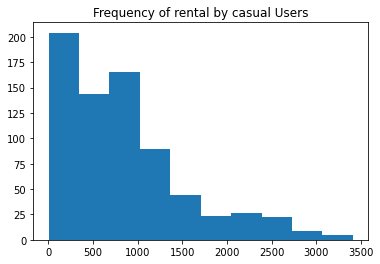

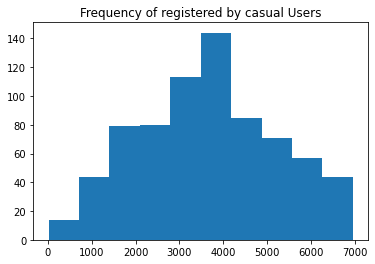

In [22]:
### Using hist() to visualize the frequency of 'casual' and 'registered' column ###
plt.hist(bike_sharing['casual'])
plt.title("Frequency of rental by casual Users")
plt.show()
plt.hist(bike_sharing['registered'])
plt.title("Frequency of registered by casual Users")
plt.show()

11.5. The histogram for the registered users shows a symmetrical distribution consisting of a normal distribution. Most of the values pile up in the middle, and frequency gradually decreases on both left and right side of the histogram. 

11.6. The histogram for the casual users shows skewed distribution with values piling up on the left.   

### 12. Conclusion

12.1. The total number of bike rentals have increased by over 60% from 2011 to 2012. The registered users contributes to about 81% of the total number of bike rentals. 

12.2. The number of bike rental by registered users are higher on weekdays. In comparision, the casual users tend to rent the bike more on non-working days. 

12.3. The number of bike rentals increases in summer and decreases in winter. Therefore, the number of rental is lower during low temperature and high wind speed.  

12.4. On average, the number of bike rental by registered users are 3 times more than the number of bike rental by casual users. 